In [1]:
import pandas as pd
from lifelines.datasets import load_waltons

# install by pip install lifelines

# Load the Walton's survival dataset
df = load_waltons()

# Print the dataset
print(df.head())

# Print the number of rows and columns
print(df.shape)

# The columns means:
# T = time of death or time of censoring
# E = 1 if death event occured, 0 if censored
# group = group of the individual

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137
(163, 3)


In [7]:
df.loc[:, ["E", "group"]].value_counts()

E  group  
1  control    122
   miR-137     34
0  control      7
Name: count, dtype: int64

<Axes: xlabel='T'>

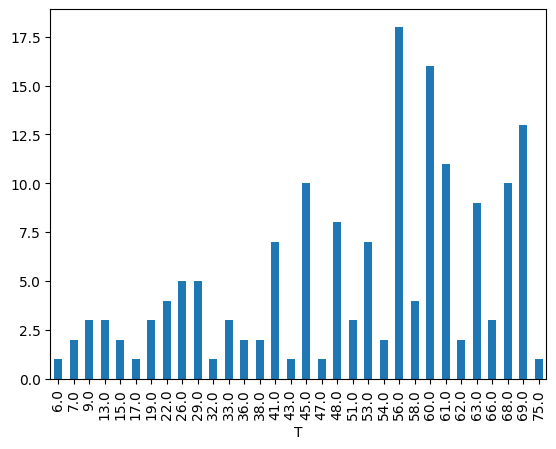

In [15]:
df.value_counts("T").sort_index().plot(kind="bar")

In [12]:
df.groupby(["E", "group"]).agg({"T": "mean"})

T
E group             
0 control  53.000000
1 control  56.081967
  miR-137  25.705882

In [6]:
df.query("E == 0")

,T,E,group
39,61.0,0,control
41,61.0,0,control
54,69.0,0,control
71,68.0,0,control
89,7.0,0,control
144,45.0,0,control
152,60.0,0,control


In [16]:
# Import the KaplanMeierFitter class
from lifelines import KaplanMeierFitter

# Create a KaplanMeierFitter instance
kmf = KaplanMeierFitter()

In [17]:
# Fit the data into the model
T = df["T"]
E = df["E"]
kmf.fit(T, event_observed=E)

# Print the event table
kmf.event_table.head()

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,163,163
6.0,1,1,0,0,163
7.0,2,1,1,0,162
9.0,3,3,0,0,160
13.0,3,3,0,0,157


In [8]:
# Print the survival probability
kmf.survival_function_.head()

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690


In [9]:
# Print the cumulative density function
kmf.cumulative_density_.head()

,KM_estimate
timeline,
0.0,0.000000
6.0,0.006135
7.0,0.012270
9.0,0.030790
13.0,0.049310


In [10]:
# Print the median time to event
kmf.median_survival_time_

56.0

<Axes: xlabel='timeline'>

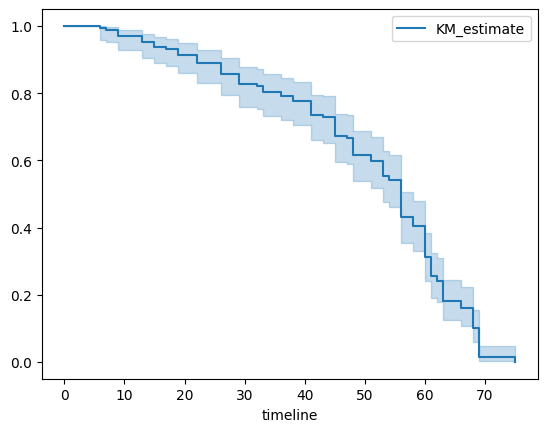

In [11]:
# plot the KM estimate
kmf.plot()

In [24]:
df.query('group == "miR-137"').sort_values("T")

,T,E,group
0,6.0,1,miR-137
19,9.0,1,miR-137
18,9.0,1,miR-137
17,9.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
20,15.0,1,miR-137
21,15.0,1,miR-137
4,19.0,1,miR-137


In [51]:
from matplotlib import pyplot as plt

<Axes: xlabel='timeline'>

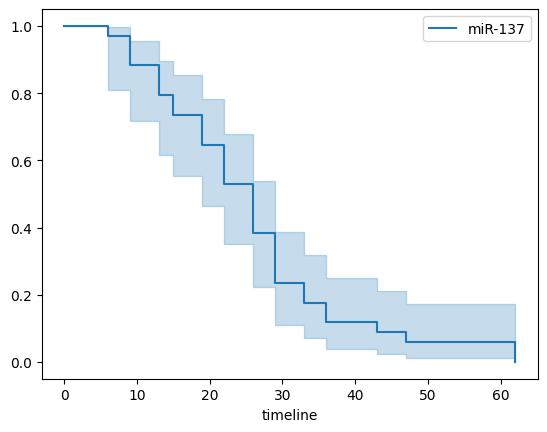

In [52]:
kmf.fit(
    df.query('group == "miR-137"')["T"],
    event_observed=df.query('group == "miR-137"')["E"],
    label="miR-137",
)
kmf.plot()

In [53]:
df.query('group == "control"').sort_values("T")

,T,E,group
89,7.0,0,control
88,7.0,1,control
78,17.0,1,control
59,32.0,1,control
34,33.0,1,control
...,...,...,...
55,69.0,1,control
56,69.0,1,control
57,69.0,1,control
133,69.0,1,control


<Axes: xlabel='timeline'>

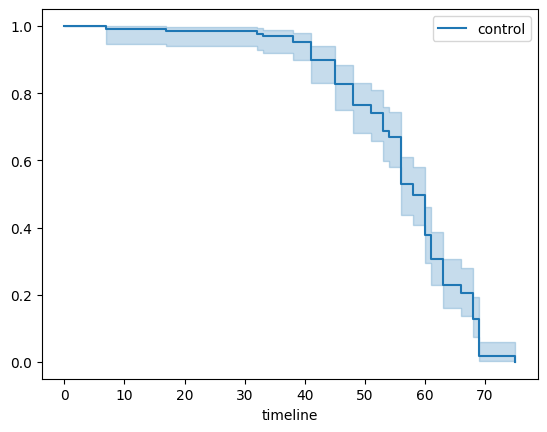

In [55]:
kmf.fit(
    df.query('group == "control"')["T"],
    event_observed=df.query('group == "control"')["E"],
    label="control",
)

kmf.plot()

       T  E    group
78  17.0  1  control
88   7.0  1  control


<Axes: xlabel='timeline'>

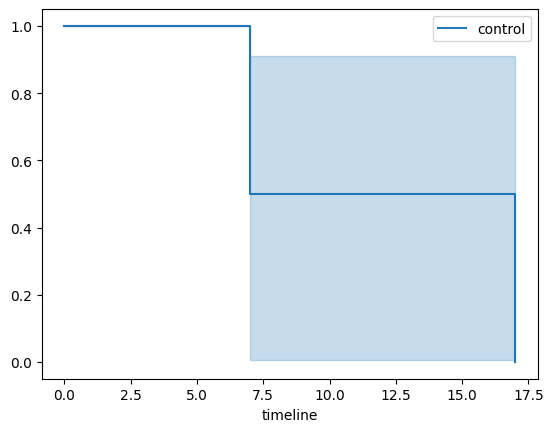

In [58]:
sdf = df.query('group == "control" and T < 20 and E == 1')
print(sdf.to_string())

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()

       T  E    group
78  17.0  1  control
88   7.0  1  control
89   7.0  0  control


<Axes: xlabel='timeline'>

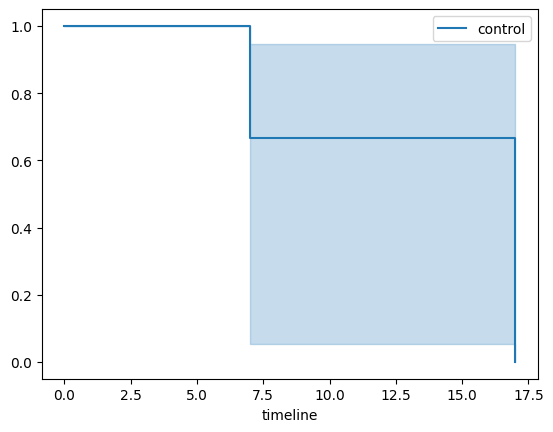

In [59]:
sdf = df.query('group == "control" and T < 20')
print(sdf.to_string())

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()

            T    E    group
7    1.040945  0.0      NaN
5    1.218000  0.0      NaN
9    1.341013  0.0      NaN
6    4.030870  0.0      NaN
4    4.262561  0.0      NaN
3    5.738641  0.0      NaN
8    6.022908  0.0      NaN
88   7.000000  1.0  control
89   7.000000  0.0  control
0    7.243079  0.0      NaN
1    7.437835  0.0      NaN
2    7.709688  0.0      NaN
78  17.000000  1.0  control


<Axes: xlabel='timeline'>

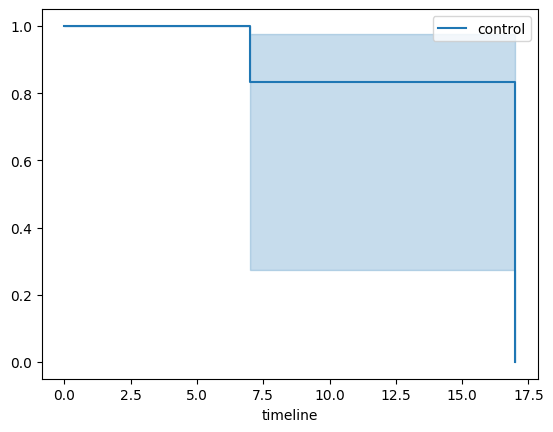

In [133]:
import numpy as np

sdf = df.query('group == "control" and T < 20')
# add censoring
c_n = 10
sdf = pd.concat(
    [
        sdf,
        pd.DataFrame(
            {
                "T": np.random.uniform(0, 8, c_n),
                "E": np.zeros(c_n),
            }
        ),
    ]
).sort_values("T")
print(sdf.to_string())

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()

        T  E    group
88    7.0  1  control
89    7.0  0  control
78   17.0  1  control
59   32.0  1  control
34   33.0  1  control
134  38.0  1  control
135  38.0  1  control


<Axes: xlabel='timeline'>

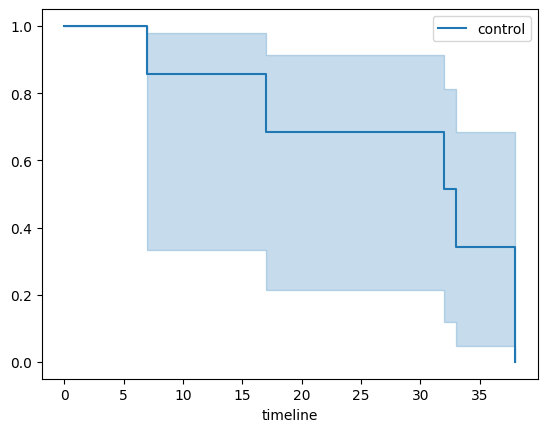

In [82]:
sdf = df.query('group == "control" and T < 40').sort_values("T")
print(sdf.to_string())

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()

        T  E    group
88    7.0  1  control
89    7.0  0  control
78   17.0  1  control
59   32.0  1  control
34   33.0  1  control
134  38.0  1  control
135  38.0  1  control
92   41.0  1  control
93   41.0  1  control
94   41.0  1  control
90   41.0  1  control
96   41.0  1  control
91   41.0  1  control
95   41.0  1  control
143  45.0  1  control
142  45.0  1  control
141  45.0  1  control
140  45.0  1  control
139  45.0  1  control
138  45.0  1  control
137  45.0  1  control
136  45.0  1  control
145  45.0  1  control
144  45.0  0  control
103  48.0  1  control
102  48.0  1  control
101  48.0  1  control
99   48.0  1  control
98   48.0  1  control
97   48.0  1  control
104  48.0  1  control
100  48.0  1  control


<Axes: xlabel='timeline'>

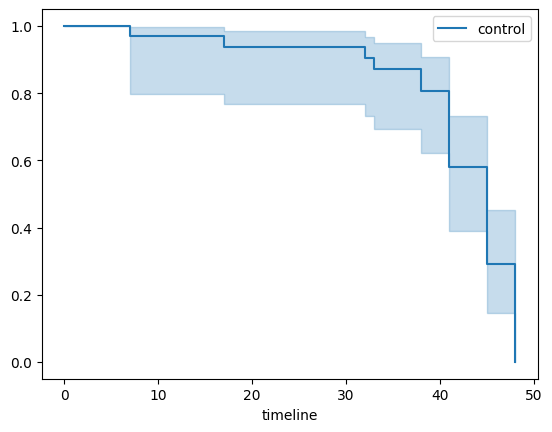

In [63]:
sdf = df.query('group == "control" and T < 50').sort_values("T")
print(sdf.to_string())

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()

        T  E    group
79   51.0  1  control
81   51.0  1  control
80   51.0  1  control
150  53.0  1  control
149  53.0  1  control
148  53.0  1  control
147  53.0  1  control
146  53.0  1  control
61   53.0  1  control
60   53.0  1  control
35   54.0  1  control
36   54.0  1  control
118  56.0  1  control
105  56.0  1  control
122  56.0  1  control
121  56.0  1  control
106  56.0  1  control
107  56.0  1  control
119  56.0  1  control
109  56.0  1  control
108  56.0  1  control
111  56.0  1  control
112  56.0  1  control
120  56.0  1  control
114  56.0  1  control
115  56.0  1  control
116  56.0  1  control
117  56.0  1  control
110  56.0  1  control
113  56.0  1  control
84   58.0  1  control
83   58.0  1  control
82   58.0  1  control
85   58.0  1  control
62   60.0  1  control
151  60.0  1  control
161  60.0  1  control
63   60.0  1  control
64   60.0  1  control
65   60.0  1  control
152  60.0  0  control
153  60.0  1  control
66   60.0  1  control
155  60.0  1  control
156  60.0 

<Axes: xlabel='timeline'>

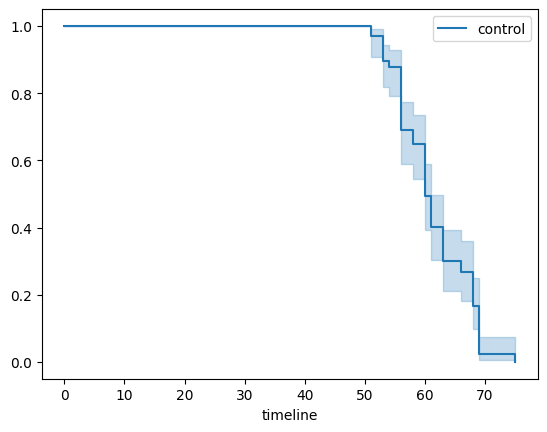

In [64]:
sdf = df.query('group == "control" and T >= 50').sort_values("T")
print(sdf.to_string())

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()

<Axes: xlabel='timeline'>

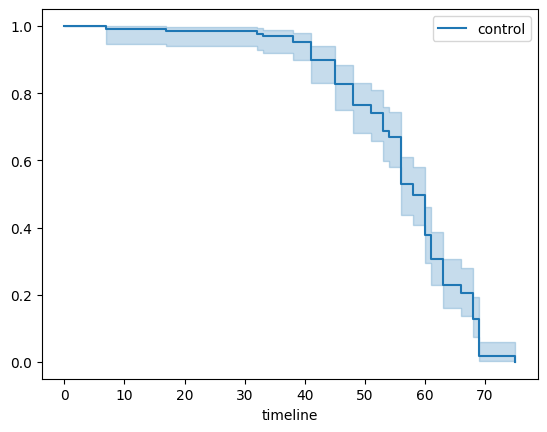

In [66]:
sdf = df.query('group == "control"').sort_values("T")

kmf.fit(
    sdf["T"],
    event_observed=sdf["E"],
    label="control",
)

kmf.plot()